In [1]:
# import libraries

import xarray as xr
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
from xgcm import Grid

plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':15})
plt.rc('mathtext',**{'default':'regular'})
plt.rc('axes',linewidth=2)
%matplotlib inline
%config InlineBackend.figure_format='retina' 


In [2]:
# This sets the paths to the files of the sensitivity simulations

run = 'REF/'
run_BS = 'BS/'
run_BSN = 'BSN/'
run_BSM = 'BSM/'
run_BSS = 'BSS/'
run_BSN48 = 'BSN48/'
run_BSM48 = 'BSM48/'
run_BSGS = 'BSGS/'
run_BSFC = 'BSFC/'
run_BSLS = 'BSLS/'
run_BSNS = 'BSNS/'
run_BSXRS = 'BSXRS/'
run_BSX = 'BSX/'
run_BSXp5 = 'BSX0.5/'

f_annual='ocean_annual.ann.nc'
f_annual_z='ocean_annual_z.ann.nc'
f_annual_rho2 = 'ocean_annual_rho2.ann.nc'
f_monthly = 'ocean_monthly.mlotst.nc'


In [3]:
# This gets the correct coordinates from the Mosaic grid spec file

dss = xr.open_dataset('ocean_annual_z.static.nc')
dsg = xr.open_dataset('ocean_hgrid.nc')
xh, yh = dsg.x[1::2,1::2], dsg.y[1::2,1::2]
xq, yq = dsg.x[::2,::2], dsg.y[::2,::2]

# This opens the PCMDI observation files

dso = xr.open_dataset('tos_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-8_gn_187001-202112.nc')
dsom = xr.open_dataset('sftof_input4MIPs_SSTsAndSeaIce_CMIP_PCMDI-AMIP-1-1-8_gn.nc')
dso = dso.assign_coords(lon=( dso.lon + 300 )% 360 - 300).roll(lon=300,roll_coords=True)
dsom = dsom.assign_coords(lon=( dsom.lon + 300 )% 360 - 300).roll(lon=300,roll_coords=True)
ds_obs=dso.tos.where(dsom.sftof>0).isel(time=slice(1296,1536)).mean(dim='time')
sst_obs = ds_obs.interp(lon=np.mod(xh+300,360)-300, lat=yh)

## Fig. 1

In [4]:

ds_ref=xr.open_dataset(run + f_annual)
ds_BS=xr.open_dataset(run_BS + f_annual)

dsz_ref=xr.open_dataset(run + f_annual_z)
dsz_BS=xr.open_dataset(run_BS + f_annual_z)


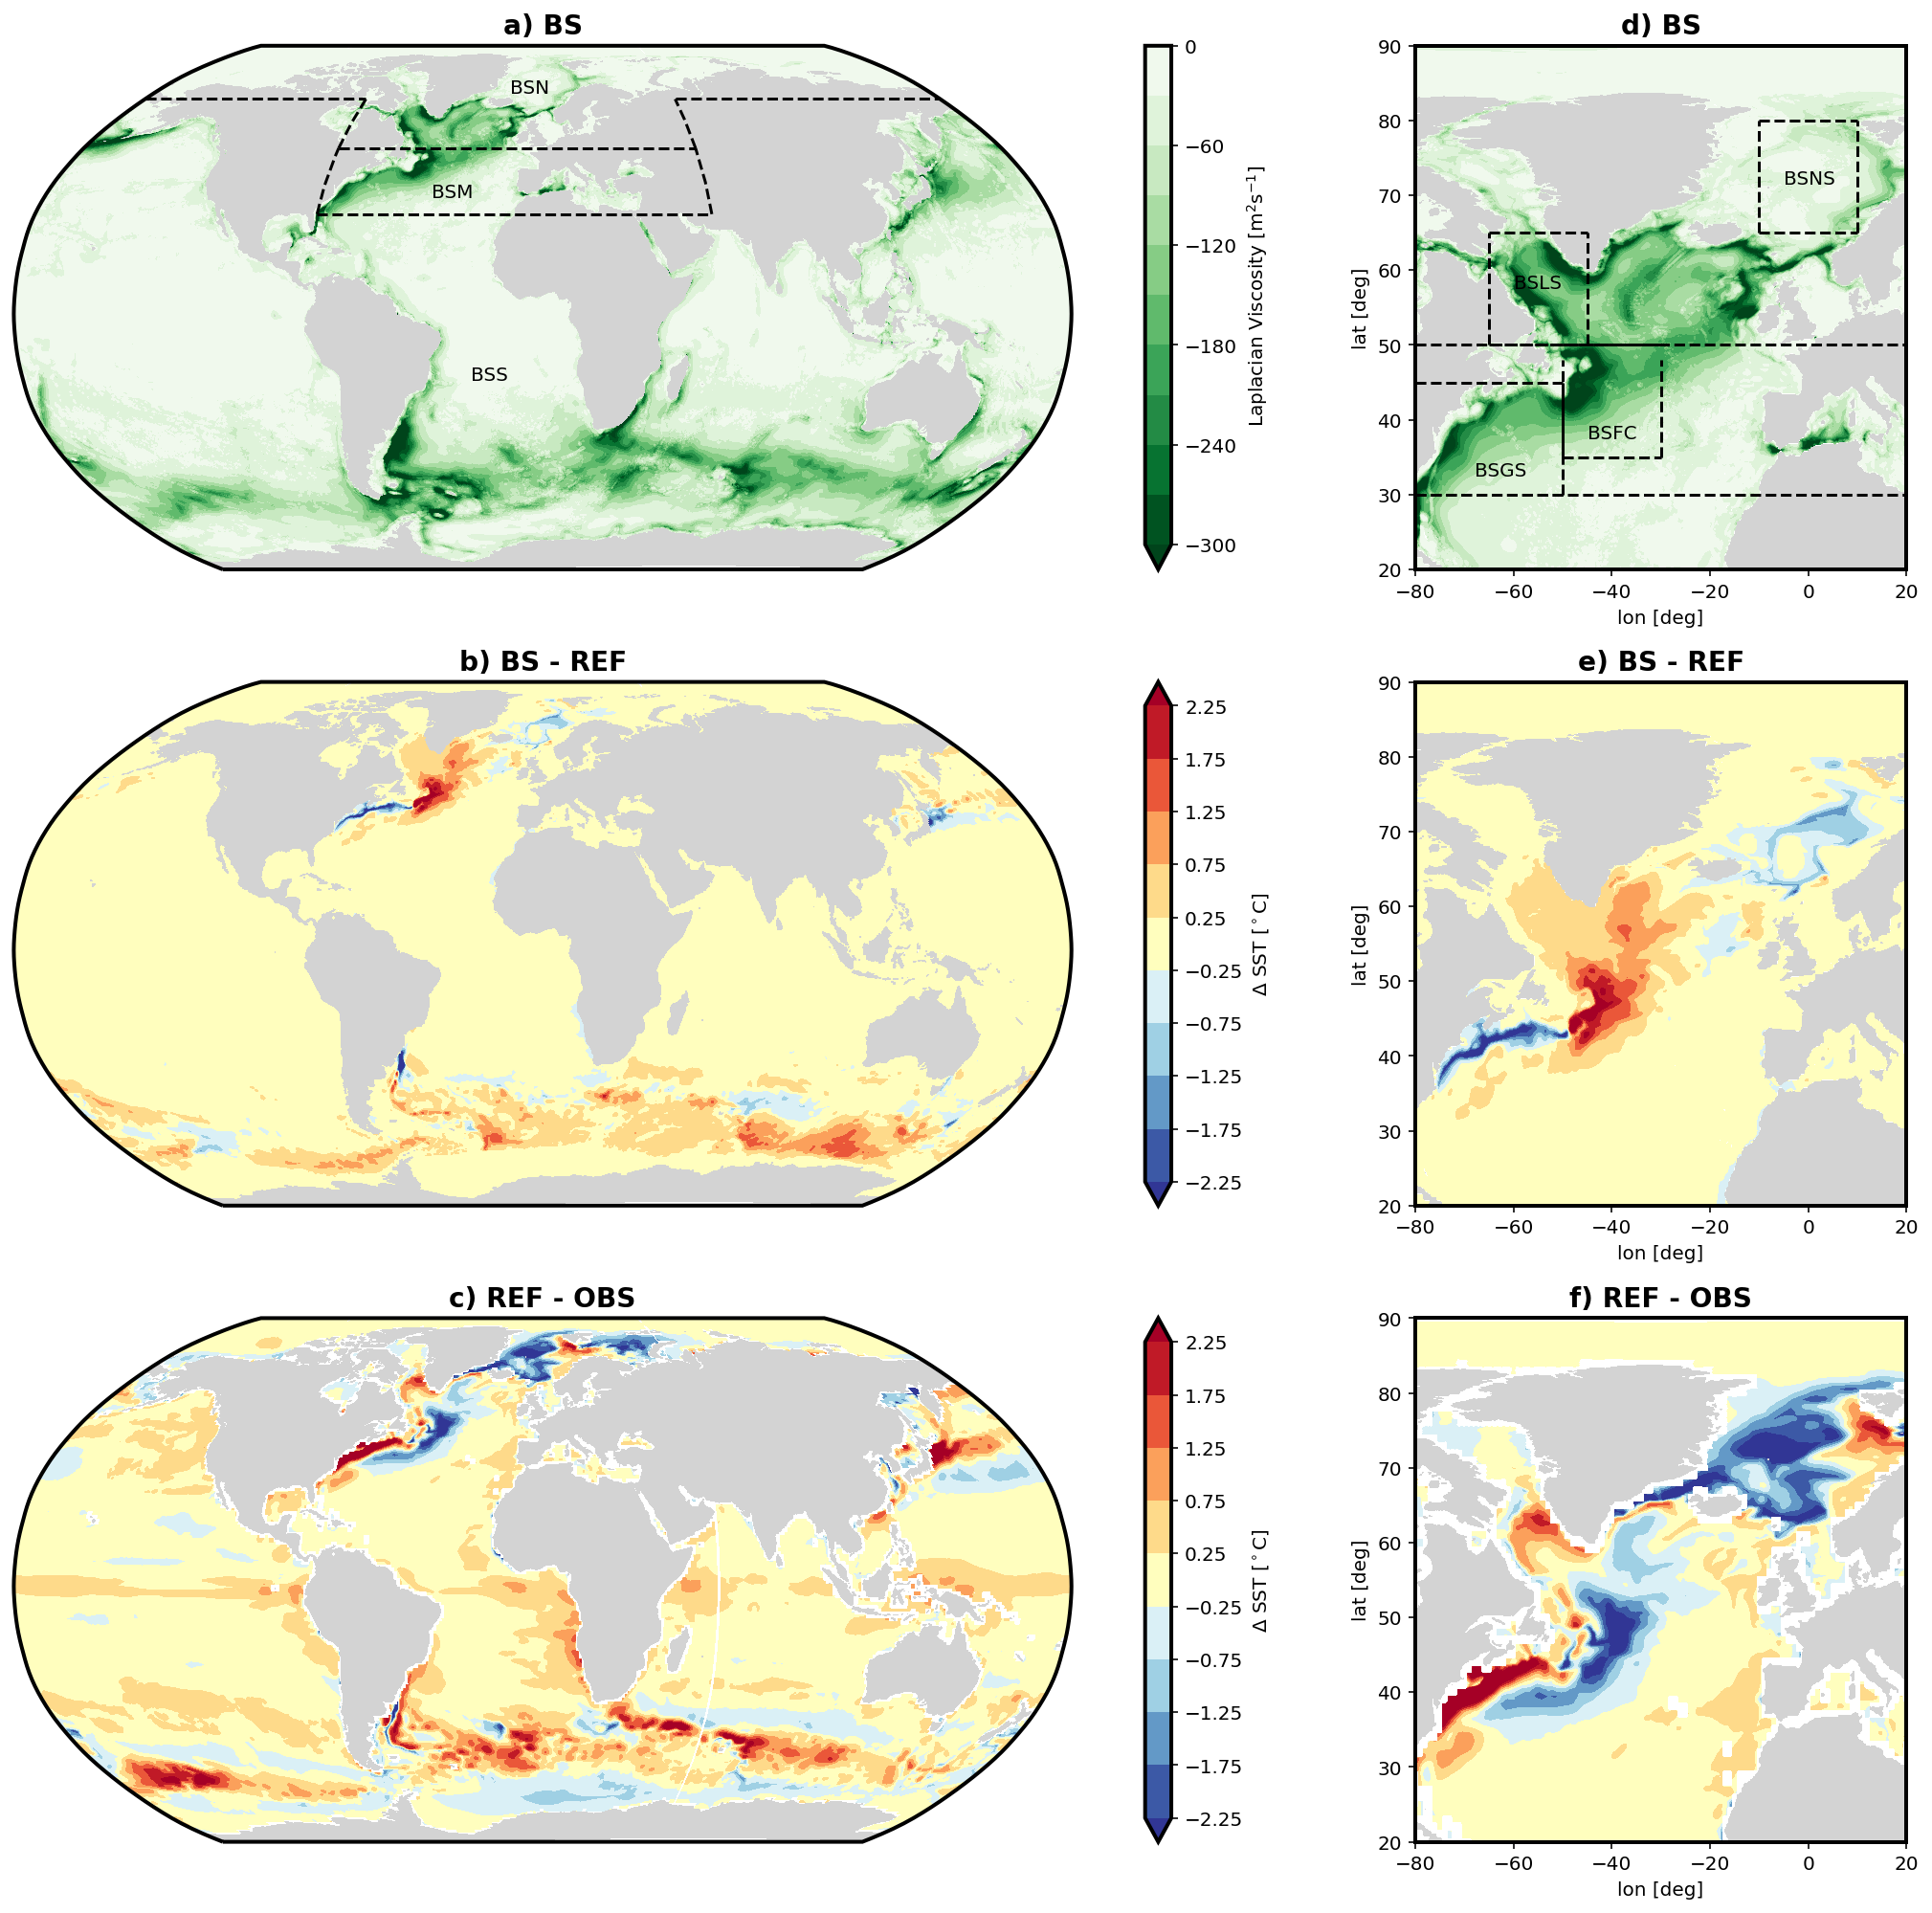

In [5]:

fig=plt.figure(figsize=(15,14)) 
gs = gridspec.GridSpec(3, 2, width_ratios=[3, 1]) 

# Antiviscosity coefficent

ax = fig.add_subplot(gs[0,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,dsz_BS['difmxylo'][0,0,:,:], levels=np.arange(-300,30,30), cmap='Greens_r',extend='min',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1);c.set_label('Laplacian Viscosity [$m^2s^{-1}$]')
ax.plot([-80,60],[50,50],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([-80,-80],[50,66],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([60,60],[50,66],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([-300,-80],[66,66],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([-80,-80],[30,50],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([60,60],[30,50],'k--',transform=cartopy.crs.PlateCarree())
ax.plot([-80,60],[30,30],'k--',transform=cartopy.crs.PlateCarree())
ax.text(-15,68,'BSN',transform=cartopy.crs.PlateCarree())
ax.text(-40,35,'BSM',transform=cartopy.crs.PlateCarree())
ax.text(-25,-20,'BSS',transform=cartopy.crs.PlateCarree())
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("a) BS",fontsize=14, weight='bold')

ax = fig.add_subplot(gs[0,1])
plt.contourf(xh,yh,dsz_BS['difmxylo'][0,0,:,:], levels=np.arange(-300,30,30), cmap='Greens_r',extend='both')
ax.plot([-80,60],[50,50],'k--')
ax.plot([-80,60],[30,30],'k--')
ax.plot([-80,-50],[45,45],'k--')
ax.plot([-80,-50],[30,30],'k--')
ax.plot([-80,-80],[30,45],'k--')
ax.plot([-50,-50],[30,45],'k--')
ax.plot([-50,-30],[50,50],'k--')
ax.plot([-50,-30],[35,35],'k--')
ax.plot([-50,-50],[35,48],'k--')
ax.plot([-30,-30],[35,48],'k--')
ax.plot([-65,-45],[50,50],'k--')
ax.plot([-65,-45],[65,65],'k--')
ax.plot([-65,-65],[50,65],'k--')
ax.plot([-45,-45],[50,65],'k--')
ax.plot([-10,10],[80,80],'k--')
ax.plot([-10,10],[65,65],'k--')
ax.plot([-10,-10],[65,80],'k--')
ax.plot([10,10],[65,80],'k--')
ax.text(-5,71.5,'BSNS')
ax.text(-60,57.5,'BSLS')
ax.text(-45,37.5,'BSFC')
ax.text(-68,32.5,'BSGS')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("d) BS",fontsize=14, weight='bold')

# SST
levels=np.arange(-4,30,1)
cmap='jet'
alevels=np.arange(-2.25,2.75,0.5)
acmap='RdYlBu_r'

ax = fig.add_subplot(gs[1,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,ds_BS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1,ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("b) BS - REF",fontsize=14, weight='bold')

ax=fig.add_subplot(gs[1,1])
plt.contourf(xh,yh,ds_BS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("e) BS - REF",fontsize=14, weight='bold')

ax = fig.add_subplot(gs[2,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,ds_ref.tos[0,:,:]-sst_obs.data, levels=alevels, cmap=acmap,extend='both',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1,ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("c) REF - OBS",fontsize=14, weight='bold')

ax=fig.add_subplot(gs[2,1])
plt.contourf(xh,yh,ds_ref.tos[0,:,:]-sst_obs.data, levels=alevels, cmap=acmap,extend='both')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("f) REF - OBS",fontsize=14, weight='bold')

plt.tight_layout()
#plt.savefig('fig_1.pdf',dpi=800)
plt.show()

## Fig. 2

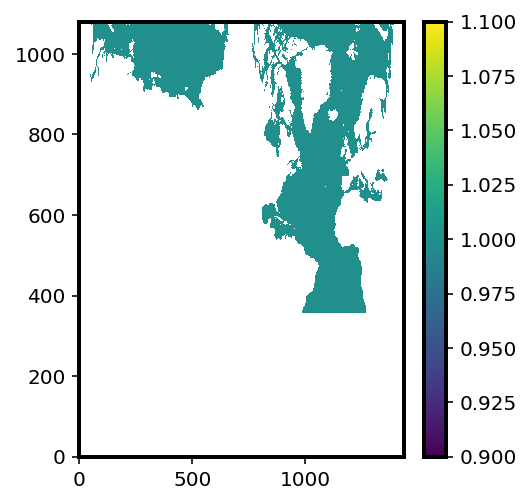

In [6]:
# Define functions for MOC calculations

def zi_at_v_for_zcoords(z_i, depth):
    """Returns 3d z* positions for interfaces at v-points in the z*-coordinate output using depth and nominal z_i"""
    nk = z_i.shape[0]-1 # Number of h layers
    shp = depth.shape
    depth_at_v = 1. * depth[:] ; depth_at_v[1:,] = 0.5 * ( depth_at_v[1:,].values + depth_at_v[:-1,].values )
    zi = np.ma.zeros((nk+1,shp[0],shp[1]))
    zi[nk,:,:] = -np.abs(depth_at_v[:,:])
    for k in range(nk,0,-1):
        #zi[k-1,:,:] = np.maximum( -np.abs(ds['z_i'][k-1].values), zi[k,:,:] )
        zi[k-1,:,:] = np.maximum( -np.abs(z_i[k-1].values), zi[k,:,:] )
    return zi

def meridional_transport(nc, mask=None):
    """Zonal sum of vmo from file nc"""
    vmo = nc['vmo'][:]
    if mask is not None:
        vmo = vmo * mask # Mask
    return vmo.sum(axis=-1).mean(axis=0) # sum the i-direction, average the time axis

def psi_from_zavmo(zavmo, top_to_bottom=False):
    """Stream function corresponding to zonally integrated mass transport"""
    shp = zavmo.shape
    psi = np.zeros((shp[0]+1,shp[1]))
    if top_to_bottom:
        for k in range(shp[0]):
            psi[k] = psi[k-1] + zavmo[k-1]
    else:
        for k in range(shp[0],0,-1):
            psi[k-1] = psi[k] - zavmo[k-1]
    if type(zavmo) is np.ma.core.MaskedArray:
        psi = np.ma.array(psi) # Turn into masked array
        psi.mask = zavmo.mask[0,:] # Use broadcasting from 1d to 2d array
    return psi

# Check masks for Atlantic + Arctic

plt.figure(figsize=(8,4))
plt.subplot(121);
basin = dss['basin'][:]
atl_mask = np.zeros(basin.shape)
atl_mask[(basin==2) | (basin==4) | (basin==6) | (basin==7) | (basin==8) | (basin==9) ] = 1
atl_vmask = 1*atl_mask; atl_vmask[:-1,:] = atl_vmask[:-1,:] * atl_vmask[1:,:]
atl_vmask = np.ma.array( atl_vmask, mask=atl_vmask==0)
plt.pcolormesh(atl_vmask); plt.colorbar();


In [7]:

dsr_ref = xr.open_dataset(run + f_annual_rho2)
dsr_BS = xr.open_dataset(run_BS + f_annual_rho2)

ds=dsr_ref
vmo_ref  = np.squeeze(ds.vmo*atl_vmask,axis=0) # transport mapped to rho2 
field = np.sum(vmo_ref,axis=2)
rpsi_ref = (np.cumsum(field,axis=0) - np.sum(field,axis=0))/1e9 #+ 0.1
vmo_ref  = np.squeeze(ds.vmo,axis=0) # transport mapped to rho2 
field = np.sum(vmo_ref,axis=2)
grpsi_ref = (np.cumsum(field,axis=0) - np.sum(field,axis=0))/1e9 #+ 0.1  
thk_ref  = np.squeeze(ds.thkcello,axis=0) # thickness mapped to rho2  
zrho_ref  = thk_ref.mean(axis=2).cumsum(axis=0) #cumulative sum of thickness to get the time averaged depth of an isopycnal 

ds=dsr_BS
vmo_BS  = np.squeeze(ds.vmo*atl_vmask,axis=0) # transport mapped to rho2 
field = np.sum(vmo_BS,axis=2)
rpsi_BS = (np.cumsum(field,axis=0) - np.sum(field,axis=0))/1e9 #+ 0.1
vmo_BS  = np.squeeze(ds.vmo,axis=0) # transport mapped to rho2 
field = np.sum(vmo_BS,axis=2)
grpsi_BS = (np.cumsum(field,axis=0) - np.sum(field,axis=0))/1e9 #+ 0.1
thk_BS  = np.squeeze(ds.thkcello,axis=0) # thickness mapped to rho2  
zrho_BS  = thk_BS.mean(axis=2).cumsum(axis=0) #cumulative sum of thickness to get the time averaged depth of an isopycnal 


In [8]:

dsm_ref = xr.open_dataset(run + f_monthly)
dsm_BS = xr.open_dataset(run_BS + f_monthly)

gb=dsm_ref.mlotst.groupby('time.year')
mld_ref=gb.max(dim='time').mean(dim='year')

gb=dsm_BS.mlotst.groupby('time.year')
mld_BS=gb.max(dim='time').mean(dim='year')


In [9]:
# Prepare grid for interpolations

grid = Grid(dss, 
                coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'}}, periodic=['X'])


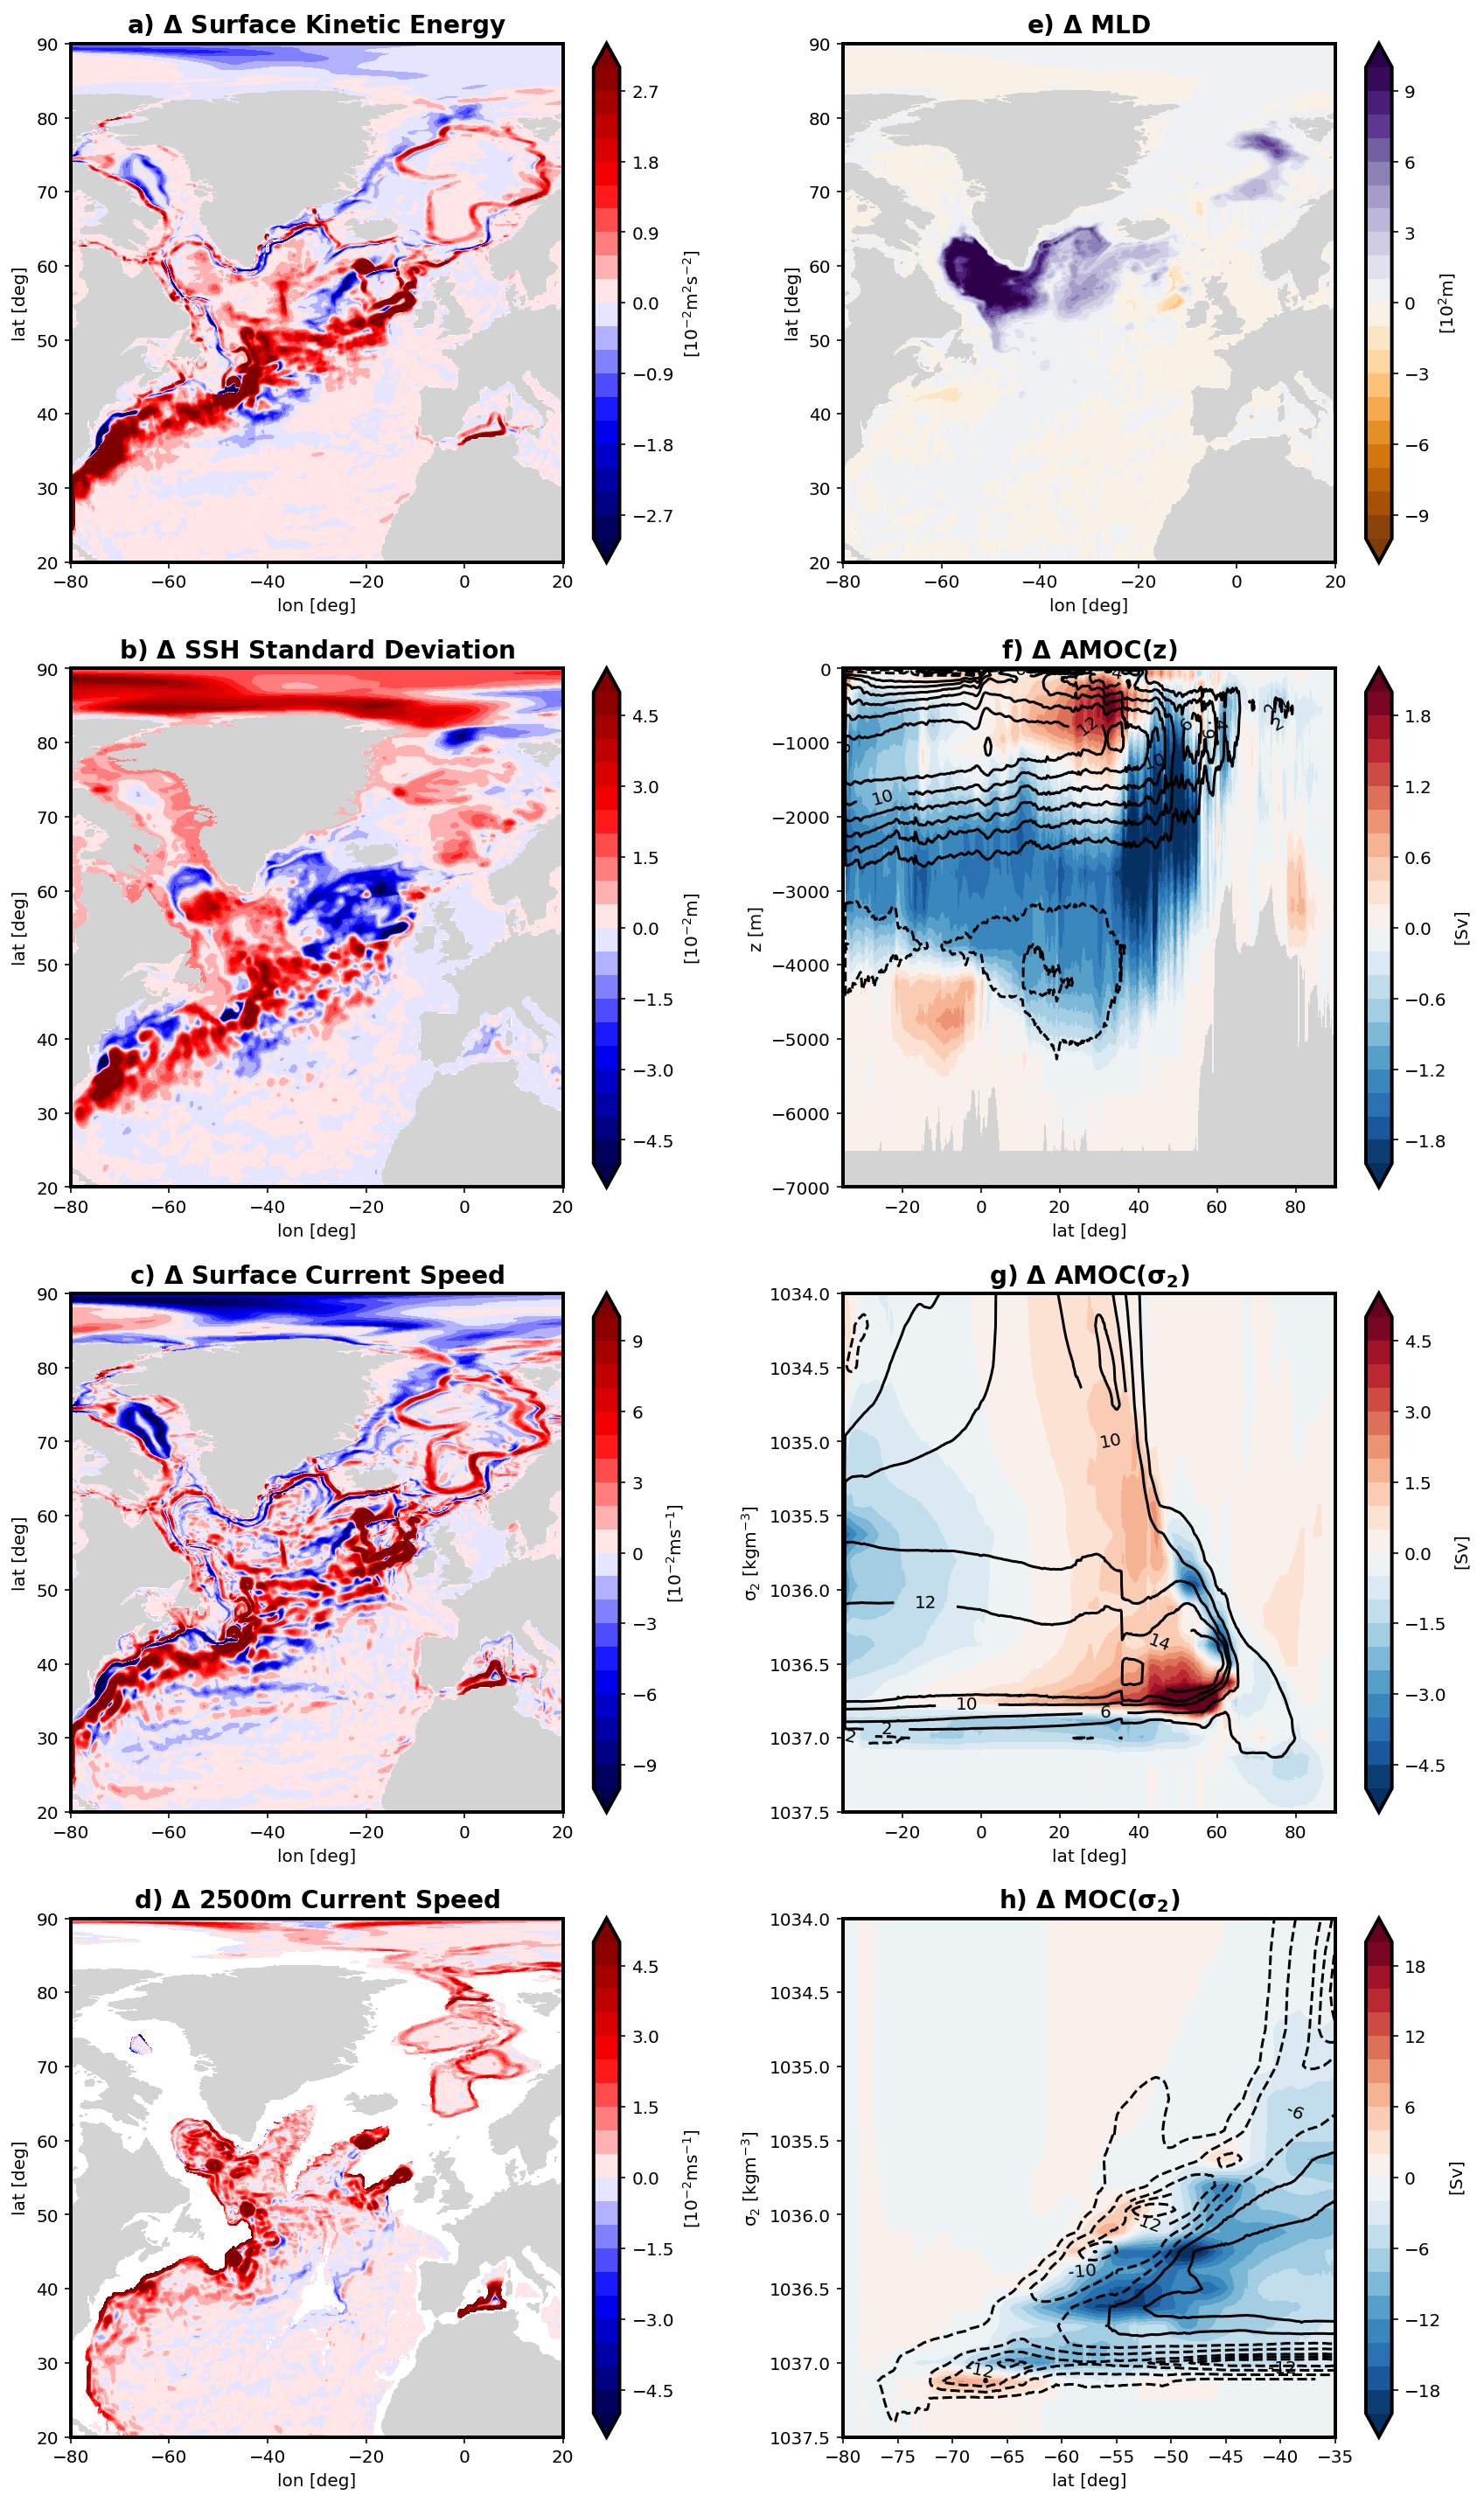

In [10]:

plt.figure(figsize=(12,20))
ds=ds_ref

# Surface KE
levels=np.arange(-3,3+0.3,0.3)
acmap='seismic'

ax=plt.subplot(4,2,1)
plt.contourf(xh,yh,(ds_BS.KE[0,0,:,:]-ds_ref.KE[0,0,:,:])*10**2, levels=levels, cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('[$10^{-2}m^2s^{-2}$]')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("a) $\Delta$ Surface Kinetic Energy",fontsize=14, weight='bold')

# SSH std
alevels=np.arange(-5,5+0.5,0.5)
acmap='seismic';

ds=ds_ref
std_ref=np.power(ds.zossq-np.power(ds.zos,2),0.5)
ds=ds_BS
std_BS=np.power(ds.zossq-np.power(ds.zos,2),0.5)

ax=plt.subplot(4,2,3)
plt.contourf(xh,yh,(std_BS[0,:,:]-std_ref[0,:,:])*10**2, levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('[$10^{-2}m$]')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("b) $\Delta$ SSH Standard Deviation",fontsize=14, weight='bold')

# Surface current
levels=np.arange(0,0.25,0.01)
cmap='Reds'
alevels=np.arange(-10,10+1,1)
acmap='seismic'

ax=plt.subplot(4,2,5)
ds=dsz_ref
ur=grid.interp(ds.uo.sel(z_l=2.5),'X',boundary='fill')
vr=grid.interp(ds.vo.sel(z_l=2.5),'Y',boundary='fill')
ds=dsz_BS
u=grid.interp(ds.uo.sel(z_l=2.5),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2.5),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('[$10^{-2}ms^{-1}$]');
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("c) $\Delta$ Surface Current Speed",fontsize=14, weight='bold')

# Deep current
levels=np.arange(0,0.2,0.01)
cmap='Reds'
alevels=np.arange(-5,5+0.5,0.5)
acmap='seismic'

ax=plt.subplot(4,2,7)
ds=dsz_ref
ur=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
vr=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')
ds=dsz_BS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('[$10^{-2}ms^{-1}$]');
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("d) $\Delta$ 2500m Current Speed",fontsize=14, weight='bold')

# MLD
alevels=np.arange(-10,10+1,1)
acmap='PuOr'

ax=plt.subplot(4,2,2)
#plt.contourf(xh,yh,(ds_BS.mlotstmax[0,:,:]-ds_ref.mlotstmax[0,:,:])*10**-2, levels=alevels, cmap=acmap,extend='both')
plt.contourf(xh,yh,(mld_BS[:,:]-mld_ref[:,:])*10**-2, levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('[$10^{2}m$]');
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("e) $\Delta$ MLD",fontsize=14, weight='bold')

# AMOC in z coordinate 
nlevels = np.arange(-22,0,2)
plevels = np.arange(2,20,2)
alevels = np.arange(-2,2.2,0.2)
acmap = 'RdBu_r'

psi_ref = psi_from_zavmo( meridional_transport(dsz_ref, mask=atl_vmask), top_to_bottom=False )/1.035e9
psi_BS = psi_from_zavmo( meridional_transport(dsz_BS, mask=atl_vmask), top_to_bottom=False )/1.035e9

ni = dss['geolat_c'].shape[1]
zi = np.nanmin(np.nan_to_num(zi_at_v_for_zcoords(dsz_ref['z_i'],dss['deptho']).data,0),axis=-1)
y = dss['geolat_c'][:,int(ni/4-1)]
y = np.broadcast_to(y,np.shape(zi));

ax=plt.subplot(4,2,4);
plt.contourf(y, zi, psi_BS-psi_ref, alevels, cmap=acmap, extend='both');
cb = plt.colorbar();cb.set_label('[$Sv$]')
ax.set_facecolor('lightgray')
CS = plt.contour(y, zi, psi_ref, nlevels, colors='k');
CS = plt.contour(y, zi, psi_ref, plevels, colors='k');
plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f')
plt.xlim(-35,90);plt.ylim(-7000,0);
plt.xlabel('lat [deg]');plt.ylabel('z [m]');
plt.title('f) $\Delta$ AMOC(z)',fontsize=14, weight='bold')

# AMOC in density coordinate
contours = [-2,2,6,10,12,14,18]
acontours = np.arange(-5,5+0.5,0.5)

ds=dsr_ref
xcoordmesh,ycoordmesh = np.meshgrid(ds.yh,ds.rho2_l)

ax=plt.subplot(4,2,6)
plt.contourf(xcoordmesh,ycoordmesh,rpsi_BS - rpsi_ref,acontours,cmap='RdBu_r',extend='both')
c=plt.colorbar();c.set_label('[$Sv$]')
CS = plt.contour(xcoordmesh,ycoordmesh,rpsi_ref,contours,colors='k');
plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f')
plt.xlim(-35,90);plt.ylim([1037.5,1034])
plt.ylabel("$\sigma_2$ [kgm$^{-3}$]")
plt.xlabel('lat [deg]')
plt.title("g) $\Delta$ AMOC($\sigma_2$)",fontsize=14, weight='bold')

# SOMOC in density coordinate
contours = [-30,-26,-22,-18,-14,-12,-10,-6,-2,2,6,10,12,14,18,22,26,30]
acontours = np.arange(-20,20+2,2)

ds=dsr_ref
xcoordmesh,ycoordmesh = np.meshgrid(ds.yh,ds.rho2_l)

ax=plt.subplot(4,2,8)
plt.contourf(xcoordmesh,ycoordmesh,grpsi_BS - grpsi_ref,acontours,cmap='RdBu_r',extend='both')
c=plt.colorbar();c.set_label('[$Sv$]')
CS = plt.contour(xcoordmesh,ycoordmesh,grpsi_ref,contours,colors='k');
plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f')
plt.xlim(-80,-35);plt.ylim([1037.5,1034])
plt.ylabel("$\sigma_2$ [kgm$^{-3}$]")
plt.xlabel('lat [deg]')
plt.title("h) $\Delta$ MOC($\sigma_2$)",fontsize=14, weight='bold')

plt.tight_layout()
#plt.savefig('fig_2.pdf',dpi=800)
plt.show()

## Fig. 3

In [11]:

ds_ref=xr.open_dataset(run + f_annual)
ds_BS=xr.open_dataset(run_BS + f_annual)

ds_BSN=xr.open_dataset(run_BSN + f_annual)
ds_BSS=xr.open_dataset(run_BSS + f_annual)
ds_BSM=xr.open_dataset(run_BSM + f_annual)

ds_BSGS=xr.open_dataset(run_BSGS + f_annual)
ds_BSFC=xr.open_dataset(run_BSFC + f_annual)
ds_BSLS=xr.open_dataset(run_BSLS + f_annual)
ds_BSNS=xr.open_dataset(run_BSNS + f_annual)


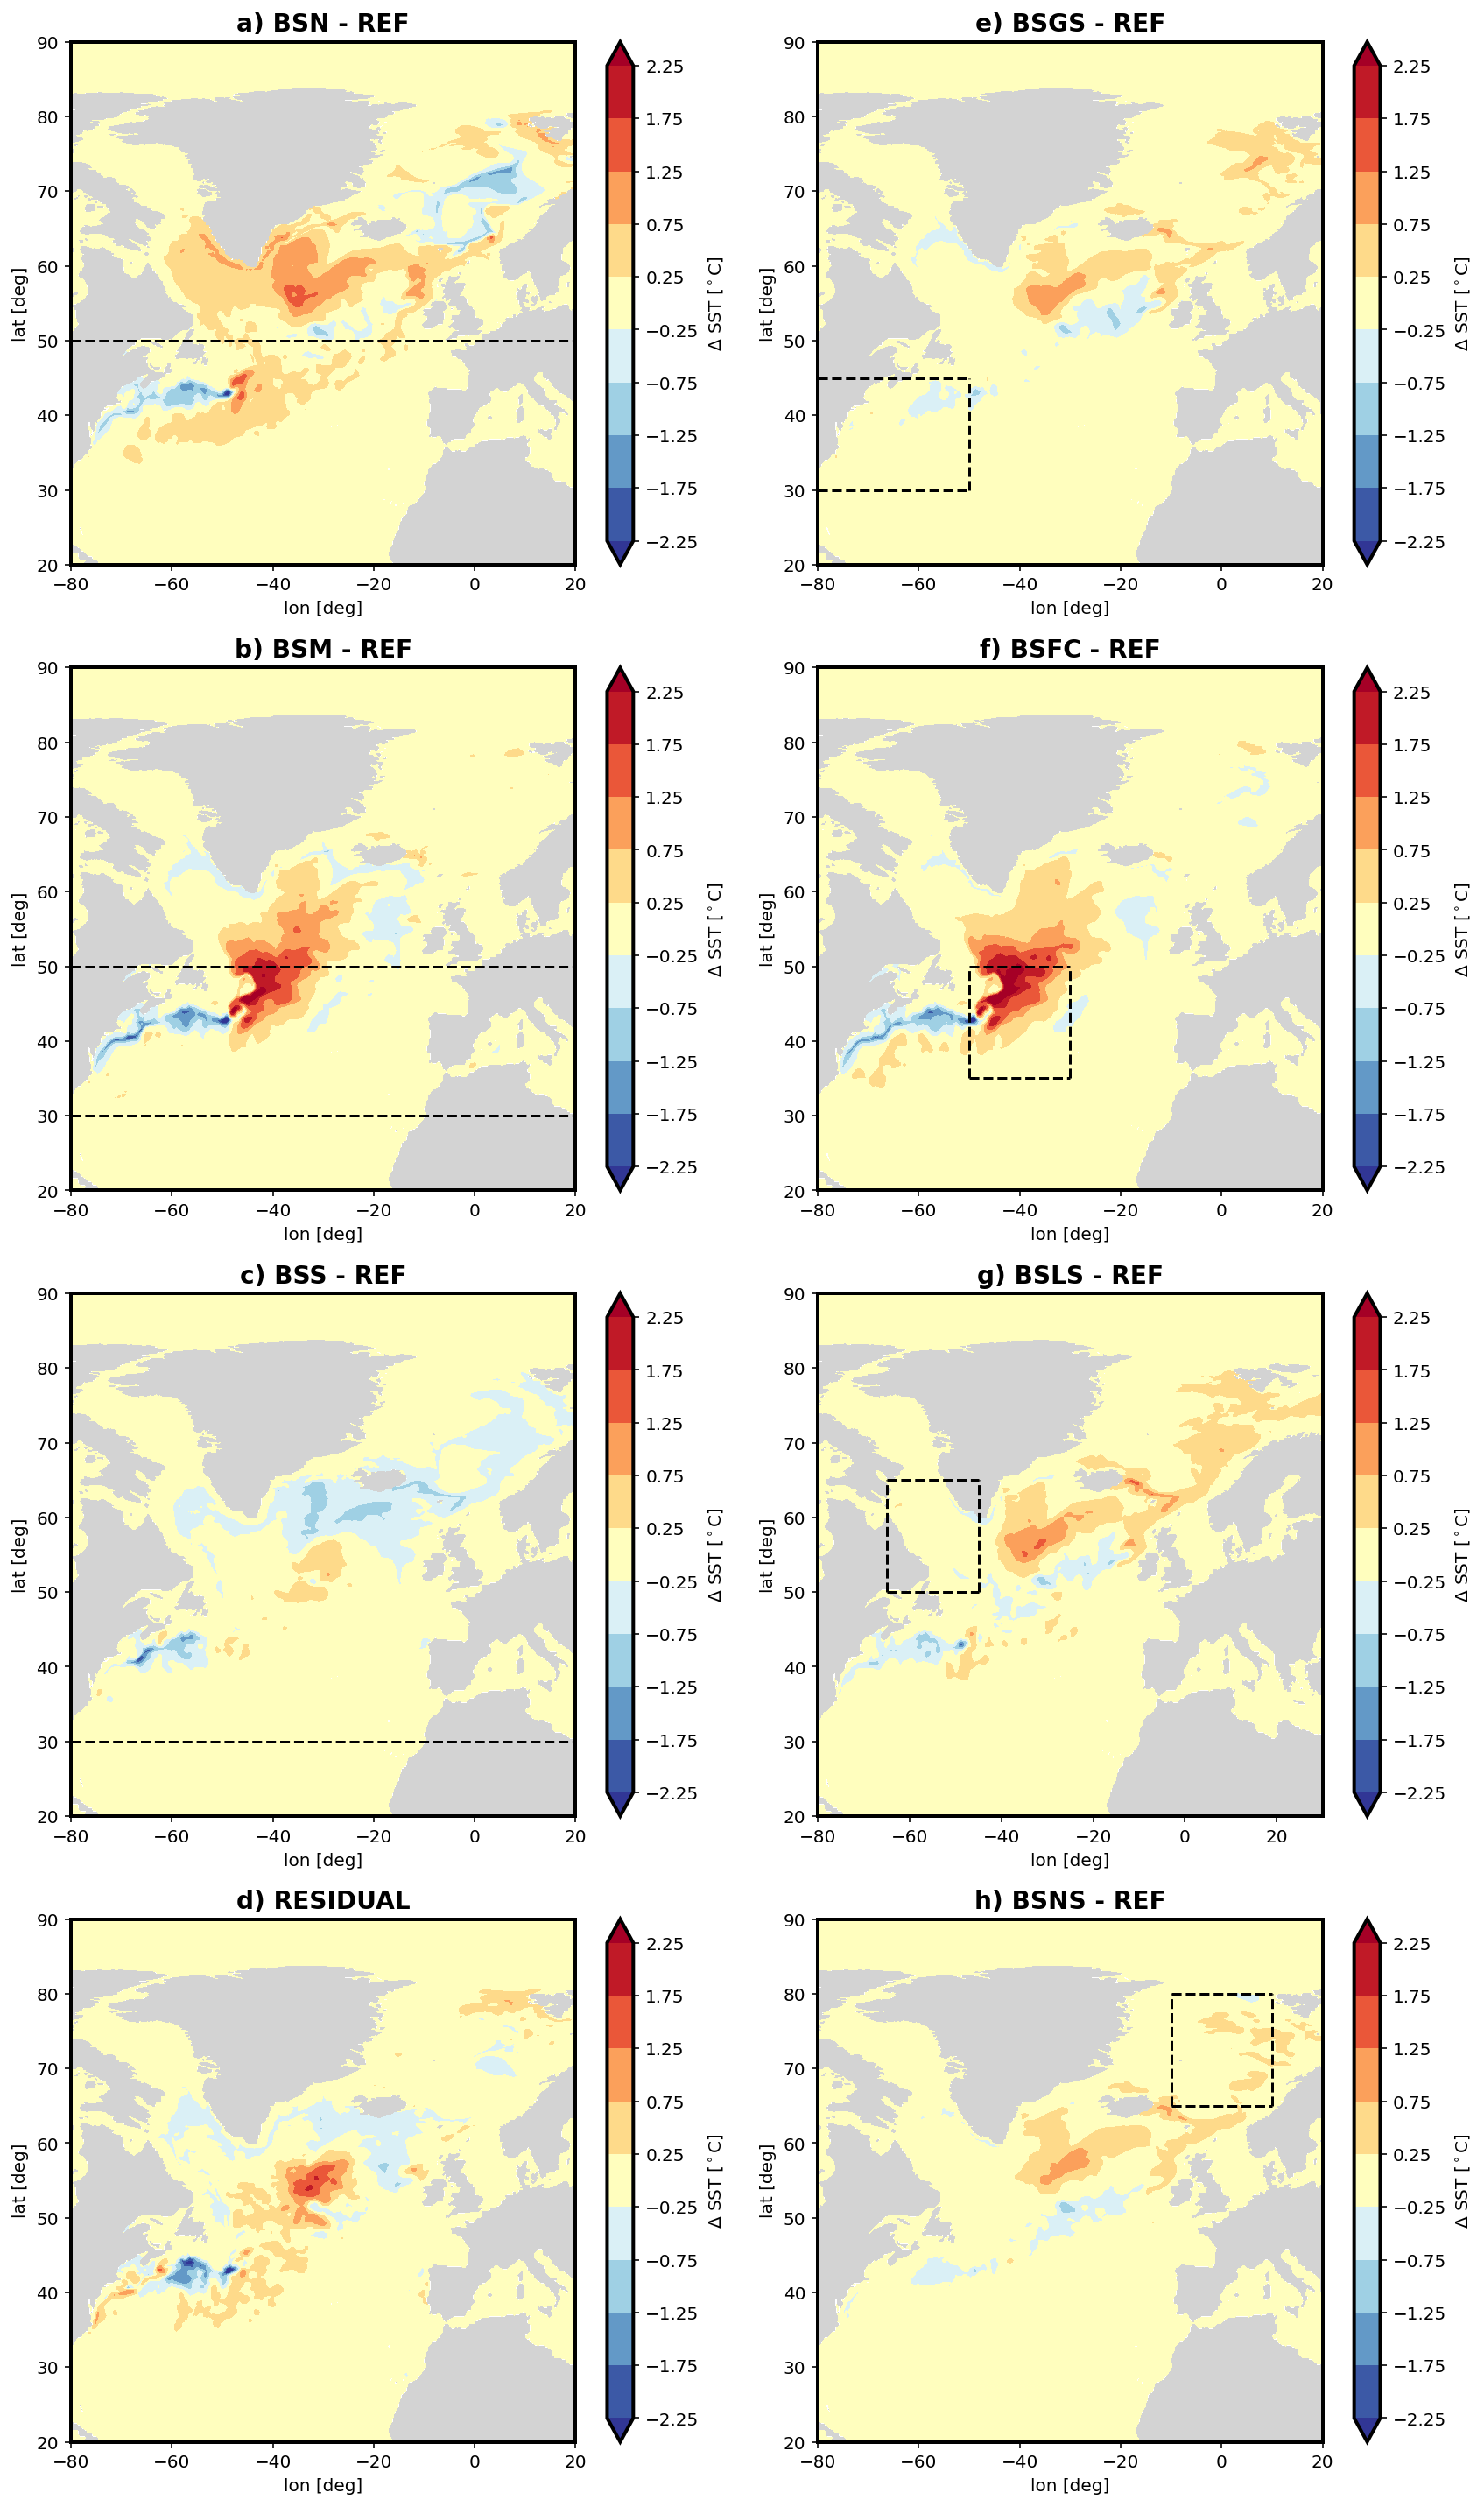

In [12]:

plt.figure(figsize=(12,20)) 

# SST
levels=np.arange(-4,30,1)
cmap='jet'
alevels=np.arange(-2.25,2.25+0.5,0.5)
acmap='RdYlBu_r'

ax=plt.subplot(4,2,1)
plt.contourf(xh,yh,ds_BSN.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,60],[50,50],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("a) BSN - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,3)
plt.contourf(xh,yh,ds_BSM.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,60],[50,50],'k--')
ax.plot([-80,60],[30,30],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("b) BSM - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,5)
plt.contourf(xh,yh,ds_BSS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,60],[30,30],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("c) BSS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,7)
tmp=(ds_BSN.tos[0,:,:]+ds_BSM.tos[0,:,:]+ds_BSS.tos[0,:,:])-ds_BS.tos[0,:,:]-2*ds_ref.tos[0,:,:]
plt.contourf(xh,yh,tmp, levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("d) RESIDUAL",fontsize=14, weight='bold')

ax=plt.subplot(4,2,2)
plt.contourf(xh,yh,ds_BSGS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,-50],[45,45],'k--')
ax.plot([-80,-50],[30,30],'k--')
ax.plot([-80,-80],[30,45],'k--')
ax.plot([-50,-50],[30,45],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("e) BSGS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,4)
plt.contourf(xh,yh,ds_BSFC.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-50,-30],[50,50],'k--')
ax.plot([-50,-30],[35,35],'k--')
ax.plot([-50,-50],[35,50],'k--')
ax.plot([-30,-30],[35,50],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("f) BSFC - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,6)
plt.contourf(xh,yh,ds_BSLS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-65,-45],[50,50],'k--')
ax.plot([-65,-45],[65,65],'k--')
ax.plot([-65,-65],[50,65],'k--')
ax.plot([-45,-45],[50,65],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 30]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("g) BSLS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,8)
plt.contourf(xh,yh,ds_BSNS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-10,10],[80,80],'k--')
ax.plot([-10,10],[65,65],'k--')
ax.plot([-10,-10],[65,80],'k--')
ax.plot([10,10],[65,80],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("h) BSNS - REF",fontsize=14, weight='bold')

plt.tight_layout()
#plt.savefig('fig_3.pdf',dpi=800)
plt.show()

## Fig. 4

In [13]:

dsz_BSN=xr.open_dataset(run_BSN + f_annual_z)
dsz_BSS=xr.open_dataset(run_BSS + f_annual_z)
dsz_BSM=xr.open_dataset(run_BSM + f_annual_z)

dsz_BSGS=xr.open_dataset(run_BSGS + f_annual_z)
dsz_BSLS=xr.open_dataset(run_BSLS + f_annual_z)
dsz_BSFC=xr.open_dataset(run_BSFC + f_annual_z)
dsz_BSNS=xr.open_dataset(run_BSNS + f_annual_z)


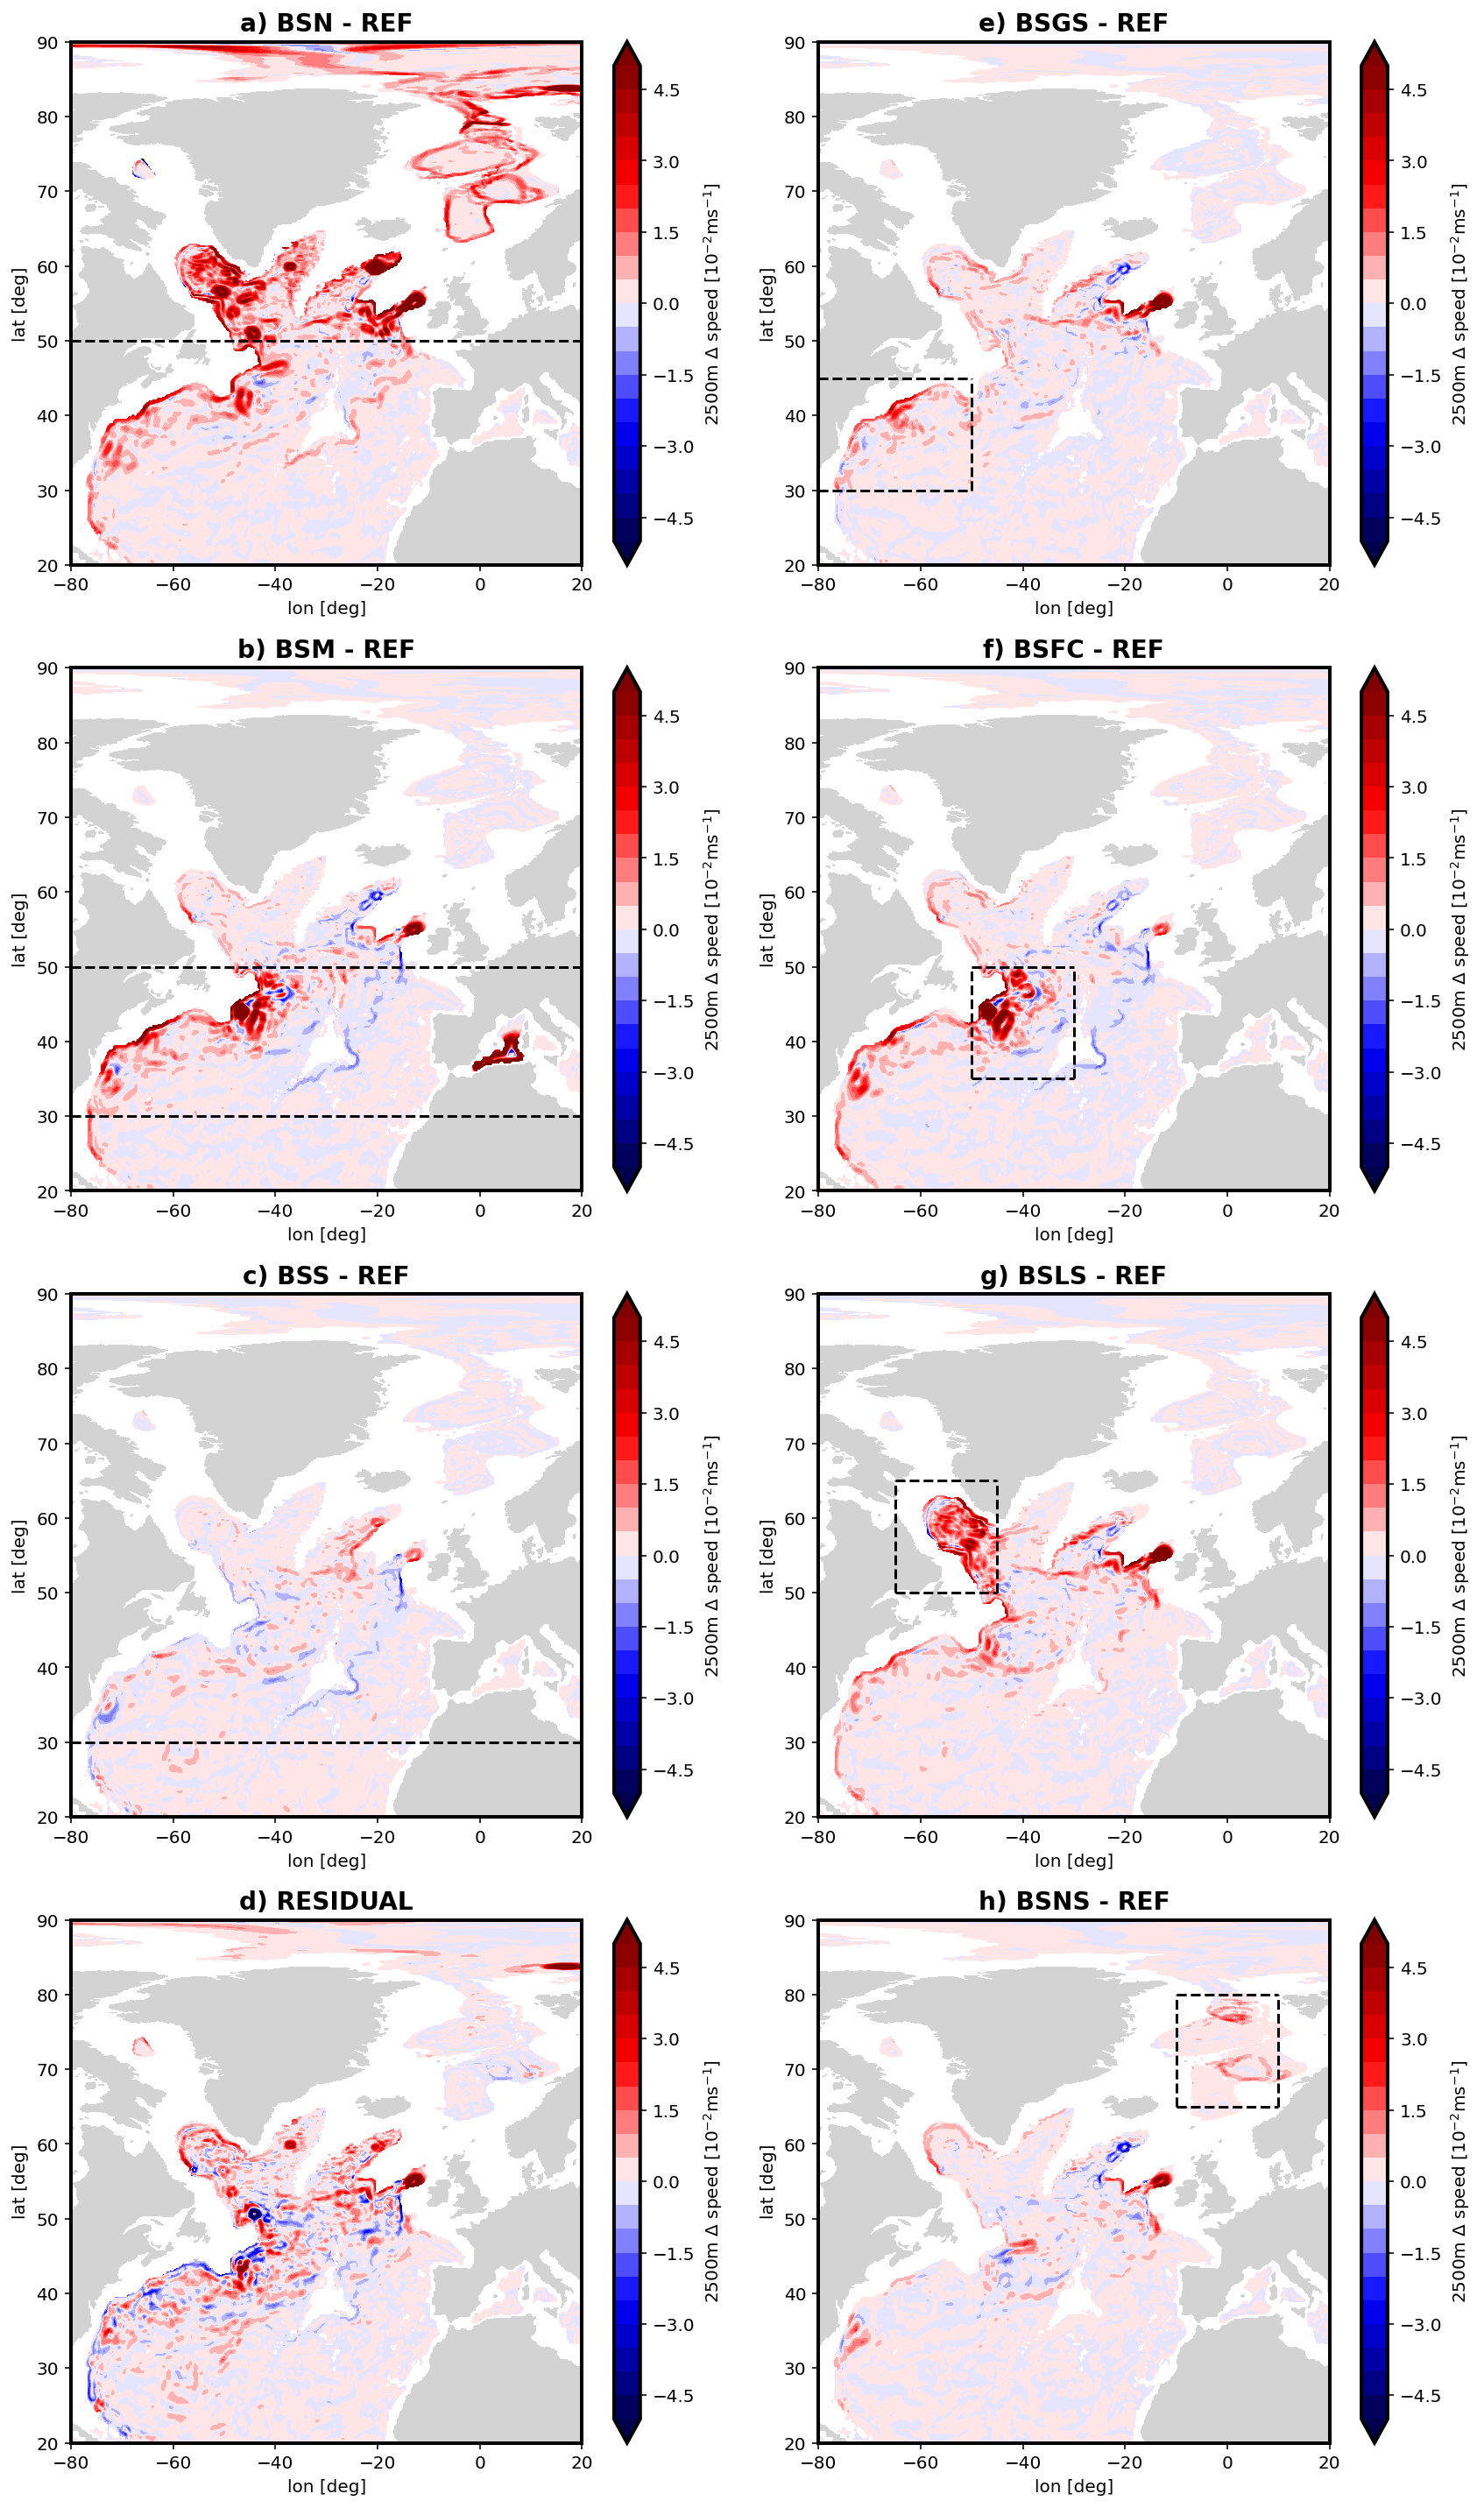

In [14]:

plt.figure(figsize=(12,20)) 

# DWBC
levels=np.arange(0,0.2,0.01)
cmap='Reds'
alevels=np.arange(-5,5+0.5,0.5)
acmap='seismic'

ds=dsz_ref
ur=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
vr=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

ax=plt.subplot(4,2,1)
ds=dsz_BSN
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-80,60],[50,50],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("a) BSN - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,3)
ds=dsz_BSM
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-80,60],[50,50],'k--')
ax.plot([-80,60],[30,30],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("b) BSM - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,5)
ds=dsz_BSS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-80,60],[30,30],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("c) BSS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,7)
ds=dsz_BSN
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')
tmp = np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2
ds=dsz_BSM
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')
tmp = tmp + np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2
ds=dsz_BSS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')
tmp = tmp + np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2
ds=dsz_BS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')
tmp = tmp - (np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2)

plt.contourf(xh,yh,tmp,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("d) RESIDUAL",fontsize=14, weight='bold')

ax=plt.subplot(4,2,2)
ds=dsz_BSGS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-80,-50],[45,45],'k--')
ax.plot([-80,-50],[30,30],'k--')
ax.plot([-80,-80],[30,45],'k--')
ax.plot([-50,-50],[30,45],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("e) BSGS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,4)
ds=dsz_BSFC
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-50,-30],[50,50],'k--')
ax.plot([-50,-30],[35,35],'k--')
ax.plot([-50,-50],[35,50],'k--')
ax.plot([-30,-30],[35,50],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("f) BSFC - REF",fontsize=14, weight='bold')


ax=plt.subplot(4,2,6)
ds=dsz_BSLS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-65,-45],[50,50],'k--')
ax.plot([-65,-45],[65,65],'k--')
ax.plot([-65,-65],[50,65],'k--')
ax.plot([-45,-45],[50,65],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("g) BSLS - REF",fontsize=14, weight='bold')

ax=plt.subplot(4,2,8)
ds=dsz_BSNS
u=grid.interp(ds.uo.sel(z_l=2500),'X',boundary='fill')
v=grid.interp(ds.vo.sel(z_l=2500),'Y',boundary='fill')

plt.contourf(xh,yh,np.squeeze(np.sqrt(u*u+v*v)-np.sqrt(ur*ur+vr*vr))*10**2,levels=alevels,cmap=acmap,extend='both')
c=plt.colorbar();c.set_label('2500m $\Delta$ speed [$10^{-2}ms^{-1}$]');
ax.plot([-10,10],[80,80],'k--')
ax.plot([-10,10],[65,65],'k--')
ax.plot([-10,-10],[65,80],'k--')
ax.plot([10,10],[65,80],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("h) BSNS - REF",fontsize=14, weight='bold')


plt.tight_layout()
#plt.savefig('fig_4.pdf',dpi=800)
plt.show()


## Fig. S1

In [15]:

ds_BSXRS=xr.open_dataset(run_BSXRS + f_annual)
ds_BSX=xr.open_dataset(run_BSX + f_annual)
ds_BSXp5=xr.open_dataset(run_BSXp5 + f_annual)


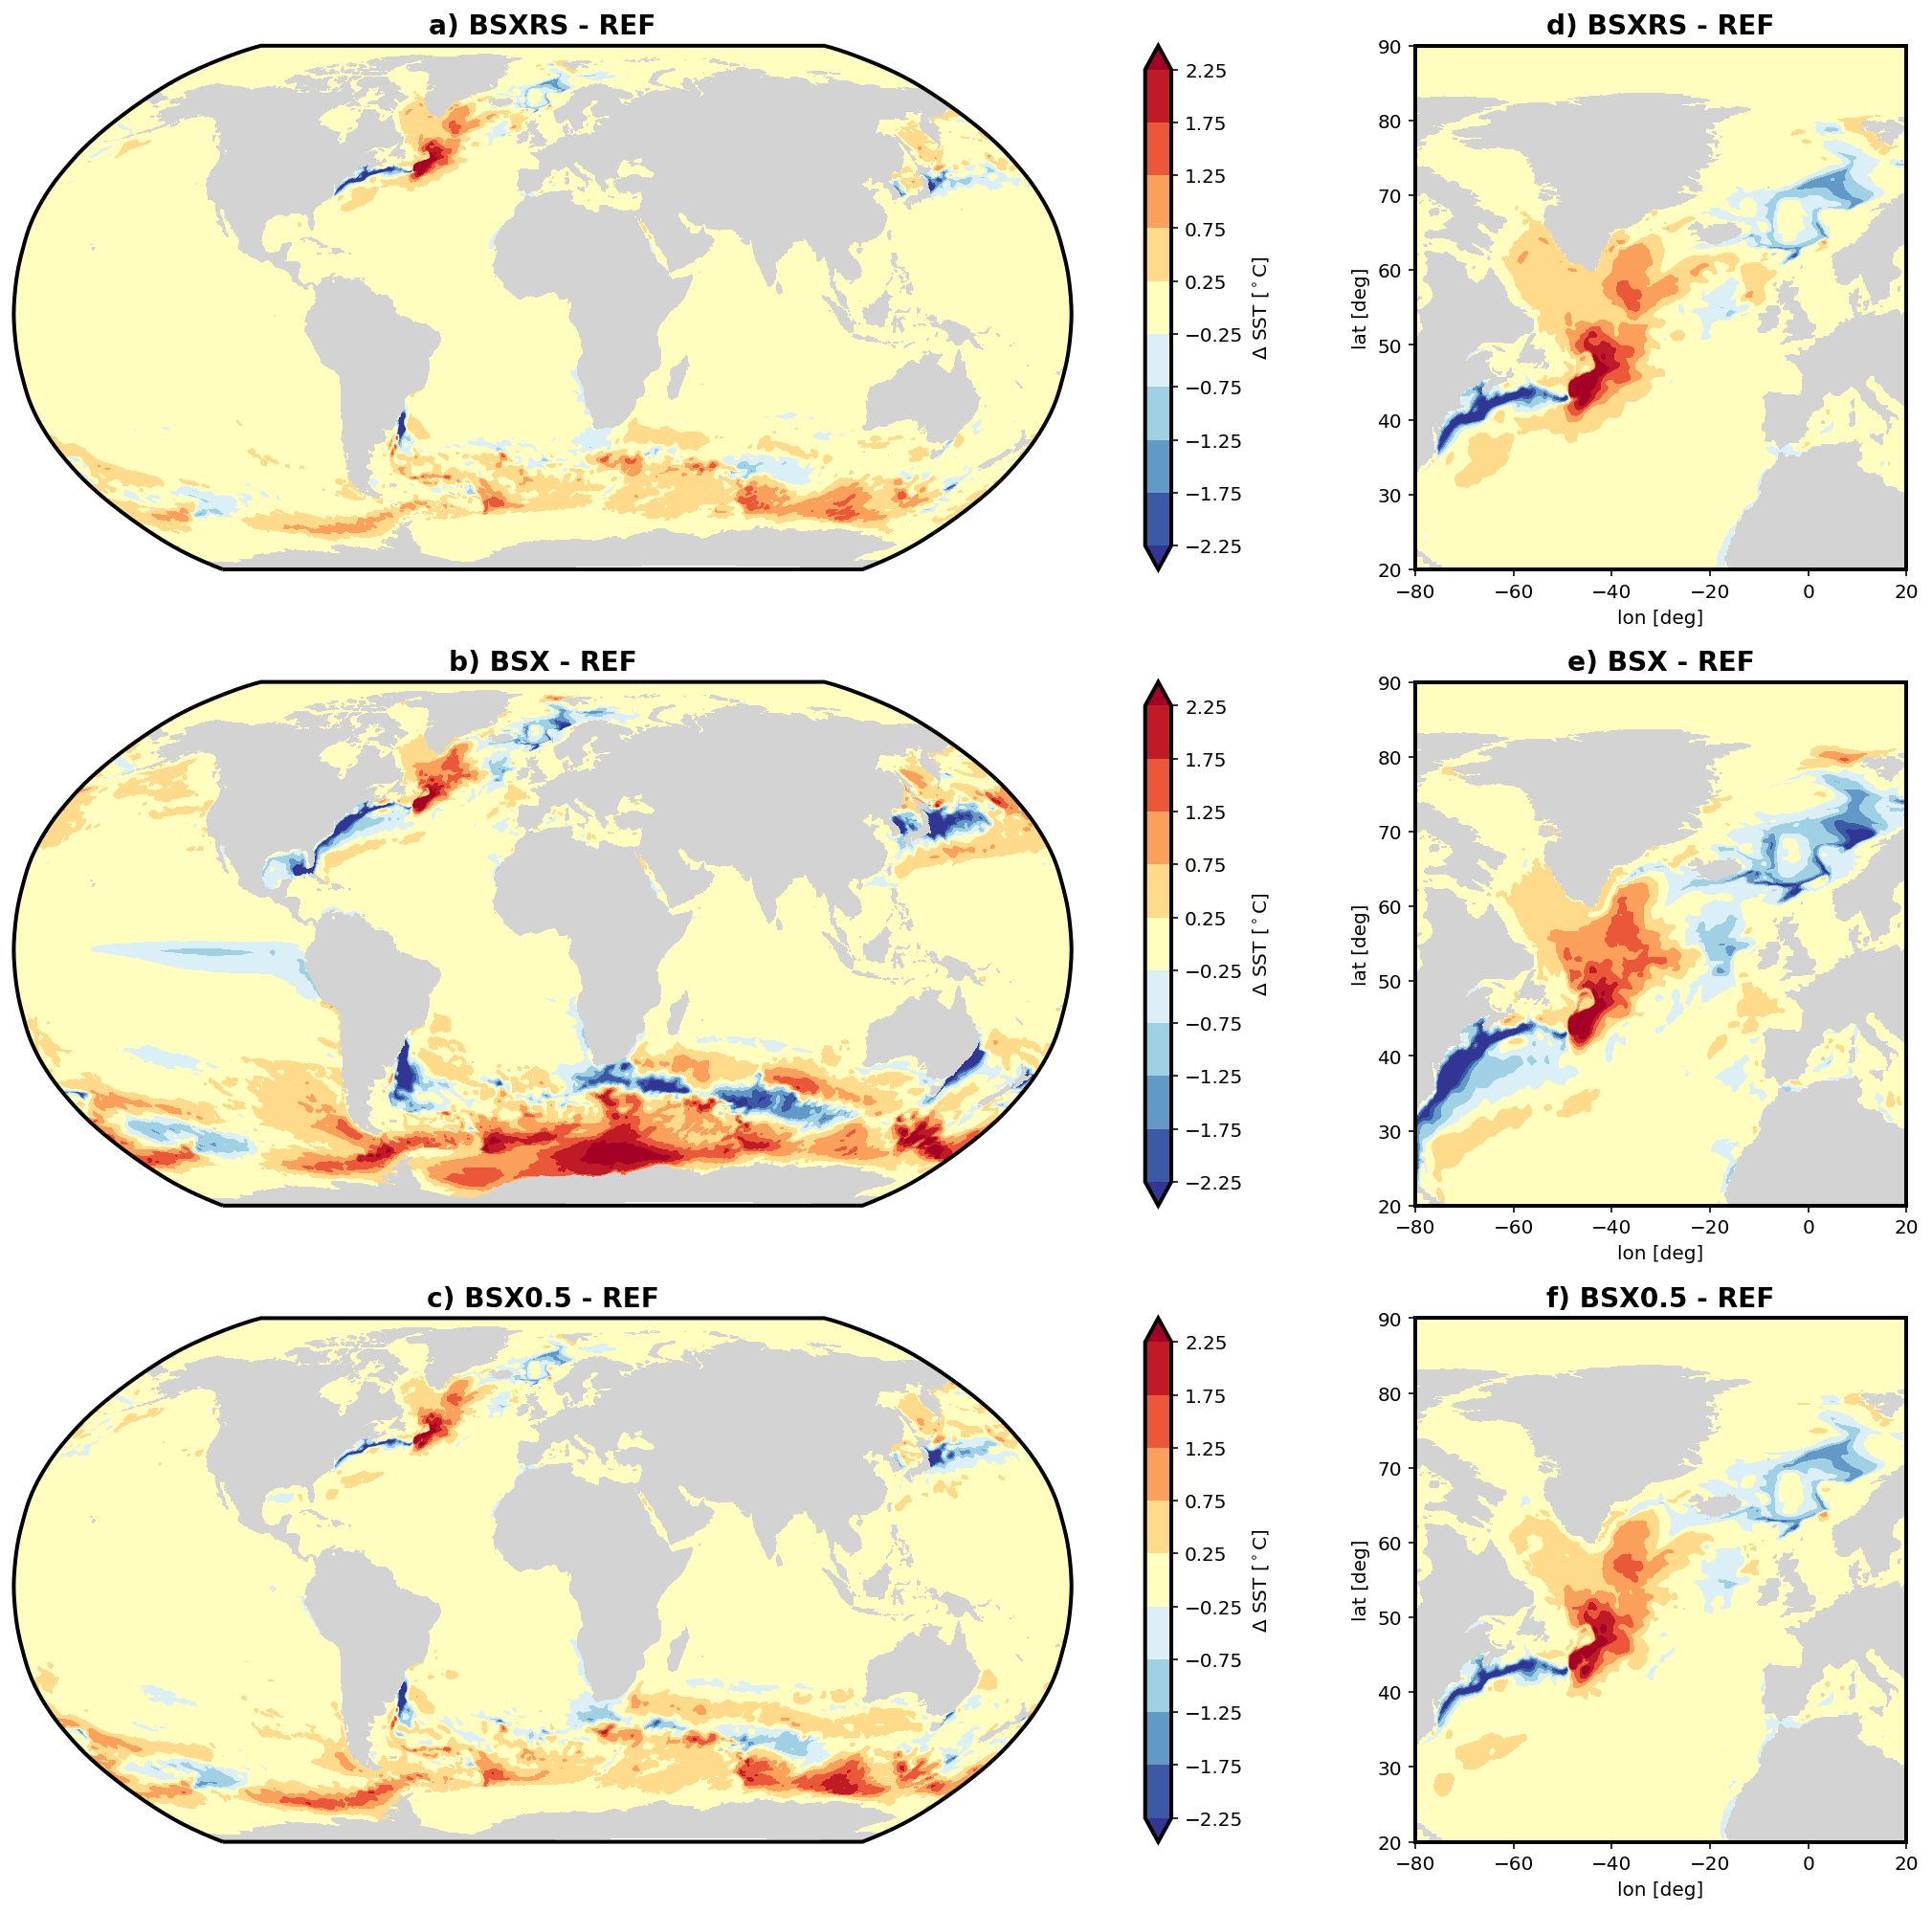

In [16]:

fig=plt.figure(figsize=(15,14)) 
gs = gridspec.GridSpec(3, 2, width_ratios=[3, 1]) 

# SST
levels=np.arange(-4,30,1)
cmap='jet'
alevels=np.arange(-2.25,2.75,0.5)
acmap='RdYlBu_r'

ax = fig.add_subplot(gs[0,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,ds_BSXRS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap, extend='both',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1,ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("a) BSXRS - REF",fontsize=14, weight='bold')

ax = fig.add_subplot(gs[1,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,ds_BSX.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap, extend='both',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1,ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("b) BSX - REF",fontsize=14, weight='bold')

ax = fig.add_subplot(gs[2,0],projection=cartopy.crs.Robinson(central_longitude=0))
h=ax.contourf(xh,yh,ds_BSXp5.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap, extend='both',transform=cartopy.crs.PlateCarree())
c=plt.colorbar(h,shrink=1,ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min',transform=cartopy.crs.PlateCarree())
plt.title("c) BSX0.5 - REF",fontsize=14, weight='bold')

ax=fig.add_subplot(gs[0,1])
plt.contourf(xh,yh,ds_BSXRS.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("d) BSXRS - REF",fontsize=14, weight='bold')

ax=fig.add_subplot(gs[1,1])
plt.contourf(xh,yh,ds_BSX.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
#c=plt.colorbar(ticks=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]);c.set_label('SST ($^\circ C$)')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("e) BSX - REF",fontsize=14, weight='bold')

ax=fig.add_subplot(gs[2,1])
plt.contourf(xh,yh,ds_BSXp5.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
#c=plt.colorbar(ticks=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]);c.set_label('SST ($^\circ C$)')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("f) BSX0.5 - REF",fontsize=14, weight='bold')

plt.tight_layout()
#plt.savefig('fig_S1.pdf',dpi=800)
plt.show()

## Fig. S2

In [17]:

ds_BSN48=xr.open_dataset(run_BSN48 + f_annual)
ds_BSS=xr.open_dataset(run_BSS + f_annual)
ds_BSM48=xr.open_dataset(run_BSM48 + f_annual)


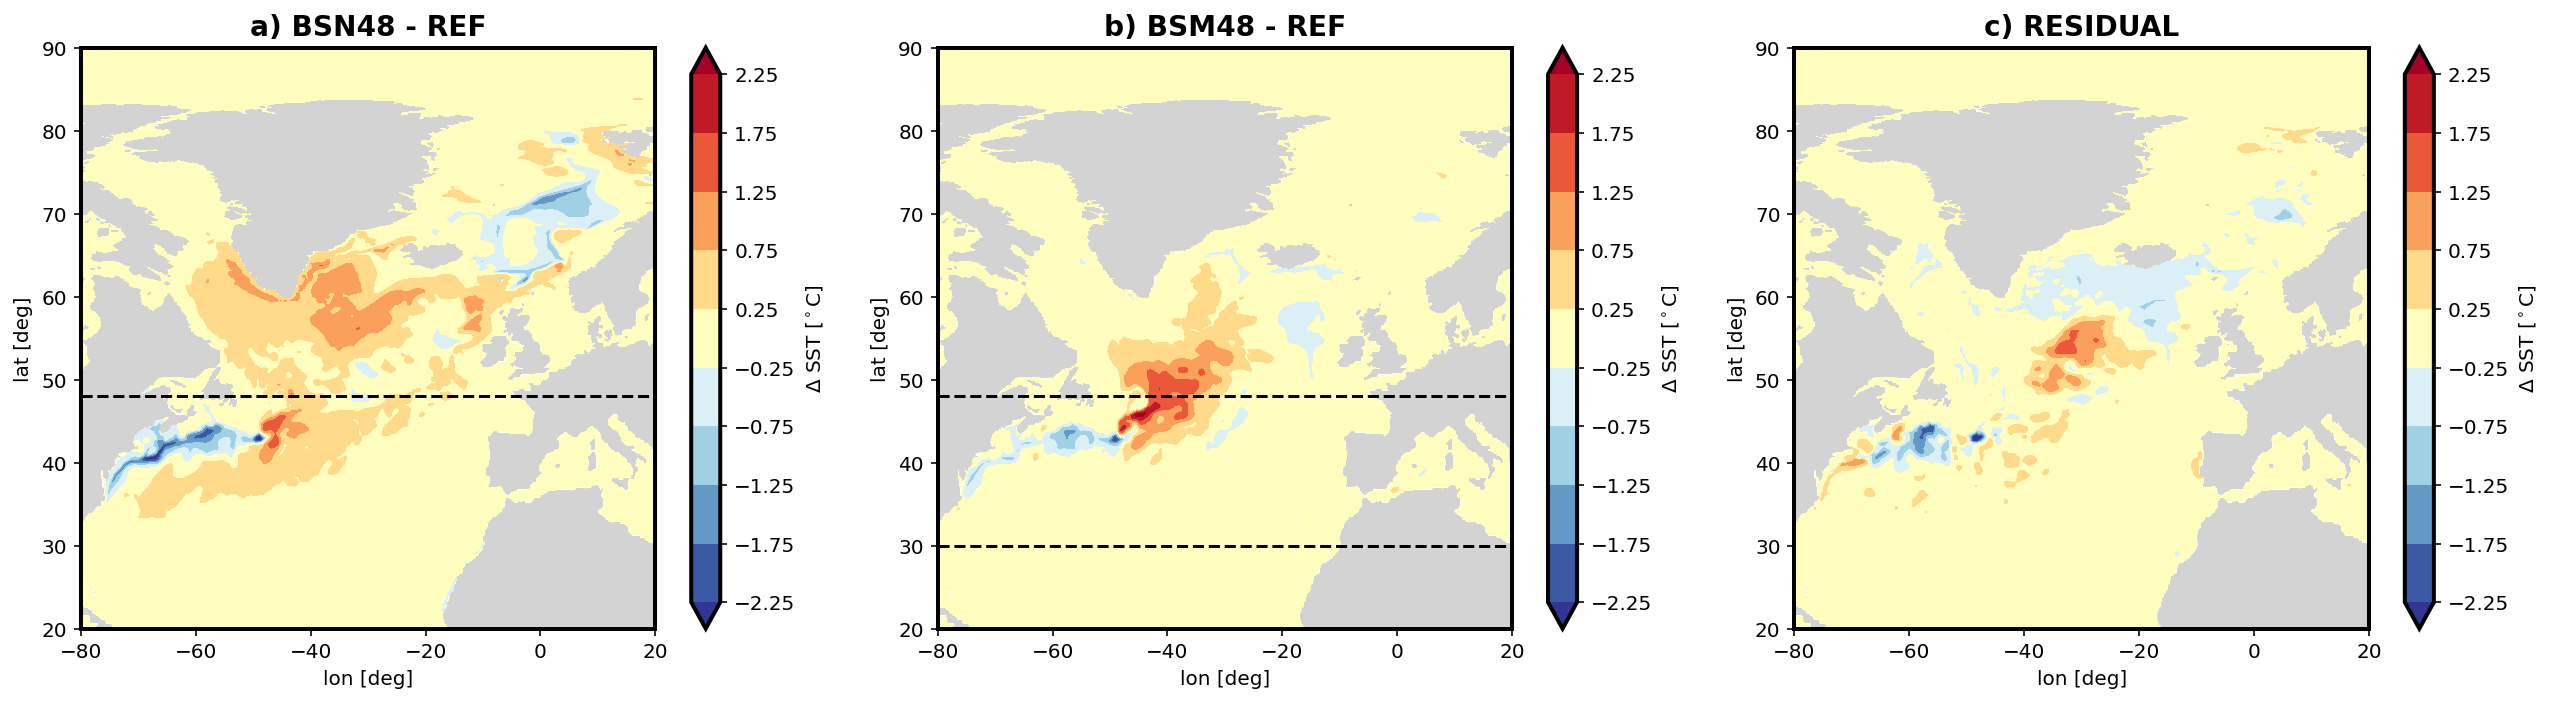

In [18]:

plt.figure(figsize=(18,5)) 

# SST
levels=np.arange(-4,30,1)
cmap='jet'
alevels=np.arange(-2.25,2.25+0.5,0.5)
acmap='RdYlBu_r'

ax=plt.subplot(1,3,1)
plt.contourf(xh,yh,ds_BSN48.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,60],[48,48],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("a) BSN48 - REF",fontsize=14, weight='bold')

ax=plt.subplot(1,3,2)
plt.contourf(xh,yh,ds_BSM48.tos[0,:,:]-ds_ref.tos[0,:,:], levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
ax.plot([-80,60],[48,48],'k--')
ax.plot([-80,60],[30,30],'k--')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("b) BSM48 - REF",fontsize=14, weight='bold')

ax=plt.subplot(1,3,3)
tmp=(ds_BSN48.tos[0,:,:]+ds_BSM48.tos[0,:,:]+ds_BSS.tos[0,:,:])-ds_BS.tos[0,:,:]-2*ds_ref.tos[0,:,:]
plt.contourf(xh,yh,tmp, levels=alevels, cmap=acmap,extend='both')
c=plt.colorbar(ticks=np.arange(-2.25,2.75,.5));c.set_label('$\Delta$ SST [$^\circ C$]')
plt.ylim([-90,90]);ax.set_ylabel("lat [deg]")
plt.xlim([-300,60]);ax.set_xlabel("lon [deg]")
ax.set_xlim([-80, 20]);ax.set_ylim([20, 90]);
plt.contourf(xh,yh,dss.wet,levels=[0,0.001],colors='lightgray',extend='min')
plt.title("c) RESIDUAL",fontsize=14, weight='bold')

plt.tight_layout()
#plt.savefig('fig_S2.pdf',dpi=800)
plt.show()